In [ ]:
import numpy as np
import numpy.linalg as npl
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
import sympy as sym
import matplotlib.pyplot as plt

In [ ]:
# observations / data
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])

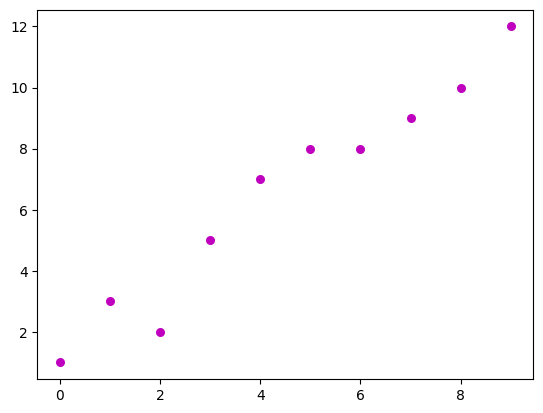

In [ ]:
# plotting the actual points as scatter plot
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)


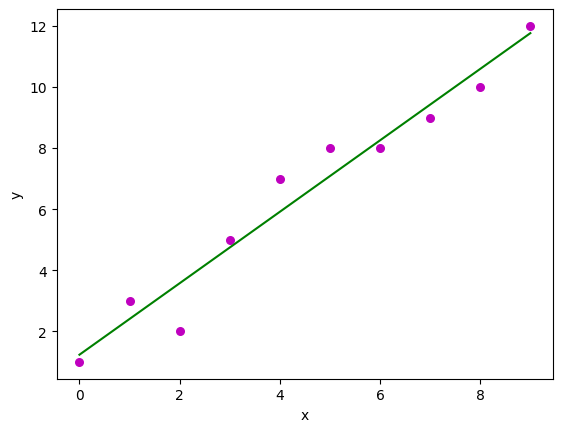

In [ ]:
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
    # predicted response line
y_pred = intercept + slope*x

    # plotting the regression line
plt.plot(x, y_pred, color = "g")

    # putting labels
plt.xlabel('x')
plt.ylabel('y')

    # function to show plot
plt.show()

# this function created to compare the two regression lines
#   against the calculated ones

In [ ]:
# Find best values by scanning all the grid values
# generate from -6 to 18 (the range of the y values + 1/2n either side), 1000 values evenly spaced out as our 'grid'
theta_0values = np.linspace(-6, 18, 1000)
theta_1values = np.linspace(-6, 18, 1000)

# initialize vars, min_cost as infinity so first MSE is always <
theta = [0, 0]
min_cost = float('inf')

# check all possible pair values
for theta_0 in theta_0values:
    for theta_1 in theta_1values:
        # MSE function from the slides, takes average over all y
        MSE = np.mean((y - (theta_0 + theta_1 * x)) ** 2)

        # check if there is a pair of values that minimize MSE more
        if MSE < min_cost:
            min_cost = MSE
            theta[0] = theta_0
            theta[1] = theta_1


print("Theta0:", theta[0])
print("Theta1:", theta[1])
print(min_cost)
# Print the "best" values for theta[0] and theta[1]

Theta0: 1.2792792792792795
Theta1: 1.1591591591591595
0.5633606579552526


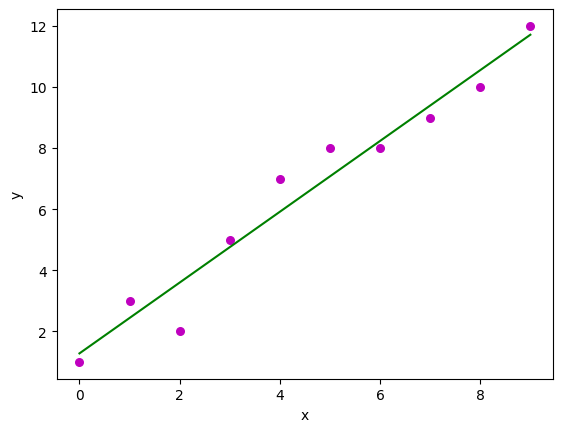

In [ ]:
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response line
y_pred = theta[0] + theta[1]*x

    # plotting the regression line
plt.plot(x, y_pred, color = "g")

    # putting labels
plt.xlabel('x')
plt.ylabel('y')

    # function to show plot
plt.show()

In [ ]:
# Use the Montecarlo Method, ie.e generate random pairs of (theta[0], theta[1]) and find the "best"
# generate from -6 to 18 (the range of the y values + 1/2n either side), 1000 randomly generated uniformly distributed values
theta_0values = np.random.uniform(-6, 18, 1000)
theta_1values = np.random.uniform(-6, 18, 1000)

# initialize vars, min_cost as infinity so first MSE is always <
theta = [0, 0]
min_cost = float('inf')

# check all pairs of randomly generated numbers
for theta_0 in theta_0values:
    for theta_1 in theta_1values:
    # MSE function from the slides, takes average over all y
        MSE = np.mean((y - (theta_0 + theta_1 * x)) ** 2)

    # check if there is a pair of values that minimize MSE more
        if MSE < min_cost:
            min_cost = MSE
            theta[0] = theta_0
            theta[1] = theta_1

print("Theta0:", theta[0])
print("Theta1:", theta[1])
print(min_cost)
# Print the "best" values for theta[0] and theta[1]

Theta0: 1.2176673723268632
Theta1: 1.1734682261199882
0.5625445547483915


Plot the lines and comment on any difference, if any

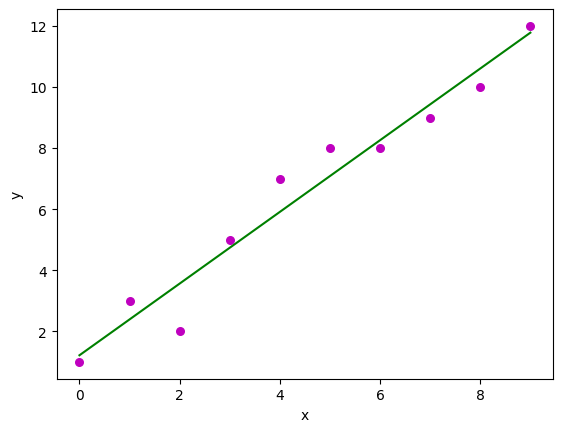

In [ ]:
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response line
y_pred = theta[0] + theta[1]*x

    # plotting the regression line
plt.plot(x, y_pred, color = "g")

    # putting labels
plt.xlabel('x')
plt.ylabel('y')

    # function to show plot
plt.show()

# the difference between the two is evident if we run the montecarlo simulation
# several times, as the "best" thetas will constantly change, however the
# overall result is pretty similar as it still tries to find the minimum square
# error from the random set of values

# I would argue that the grid calculation is more accurate as it does not miss
# any values whereas the montecarlo could potentially miss the most optimal values

In [ ]:
# finding exact values for theta_0 and theta_1
# x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
theta_best = [0, 0]
x1 = np.vstack([[1,0],[1,1],[1,2],[1,3],[1,4],[1,5],[1,6],[1,7],[1,8],[1,9]])
x1 = sym.Matrix(x1)
y1 = np.hstack([1,3,2,5,7,8,8,9,10,12])
y1 = sym.Matrix(y1)

res = (x1.transpose() * x1).inv() * x1.transpose() * y1
theta_best[0] = res[0]
theta_best[1] = res[1]
print("Theta0:", theta_best[0])
print("Theta1:", theta_best[1])

Theta0: 68/55
Theta1: 193/165


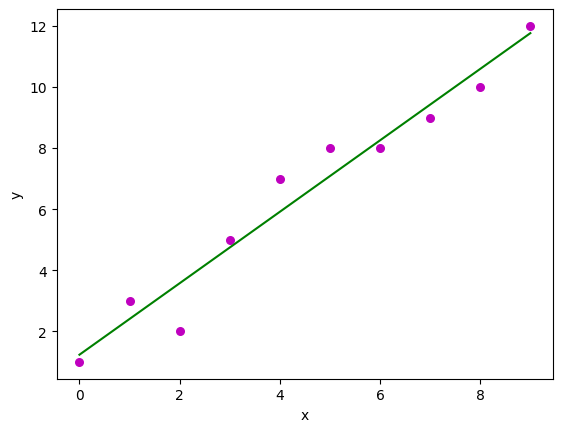

In [ ]:
plt.scatter(x, y, color = "m",
               marker = "o", s = 30)

    # predicted response line
y_pred = theta_best[0] + theta_best[1]*x

    # plotting the regression line
plt.plot(x, y_pred, color = "g")

    # putting labels
plt.xlabel('x')
plt.ylabel('y')

    # function to show plot
plt.show()